In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils.ddm_sample_generator import model_behavior
from utils.load_data import load_behavioral_data, load_ddm_results
import numpy as np

In [5]:
params_fit = load_ddm_results()
data = load_behavioral_data(min_RT=0.2)

In [6]:
model1_samples = model_behavior(model_ID=1)
model2_samples = model_behavior(model_ID=2)
model3_samples = model_behavior(model_ID=3)
model4_samples = model_behavior(model_ID=4)

In [20]:
# Group by the prospects and condition
data = (
    data.groupby(["gain", "loss", "condition"])[["RT", "accept"]].mean().reset_index()
)
model1_samples = (
    model1_samples.groupby(["gain", "loss", "condition"])[["RT", "accept"]]
    .mean()
    .reset_index()
)
model2_samples = (
    model2_samples.groupby(["gain", "loss", "condition"])[["RT", "accept"]]
    .mean()
    .reset_index()
)
model3_samples = (
    model3_samples.groupby(["gain", "loss", "condition"])[["RT", "accept"]]
    .mean()
    .reset_index()
)
model4_samples = (
    model4_samples.groupby(["gain", "loss", "condition"])[["RT", "accept"]]
    .mean()
    .reset_index()
)

# Compute the quantiles per condition
num_quantiles = 100
data["qRT"] = data.groupby("condition")["RT"].transform(
    lambda x: pd.qcut(x, num_quantiles, labels=False)
)
model1_samples["qRT"] = model1_samples.groupby("condition")["RT"].transform(
    lambda x: pd.qcut(x, num_quantiles, labels=False)
)
model2_samples["qRT"] = model2_samples.groupby("condition")["RT"].transform(
    lambda x: pd.qcut(x, num_quantiles, labels=False)
)
model3_samples["qRT"] = model3_samples.groupby("condition")["RT"].transform(
    lambda x: pd.qcut(x, num_quantiles, labels=False)
)
model4_samples["qRT"] = model4_samples.groupby("condition")["RT"].transform(
    lambda x: pd.qcut(x, num_quantiles, labels=False)
)

# Compute diff
data["diff"] = np.log(data["loss"] / data["gain"])
model1_samples["diff"] = np.log(model1_samples["loss"] / model1_samples["gain"])
model2_samples["diff"] = np.log(model2_samples["loss"] / model2_samples["gain"])
model3_samples["diff"] = np.log(model3_samples["loss"] / model3_samples["gain"])
model4_samples["diff"] = np.log(model4_samples["loss"] / model4_samples["gain"])

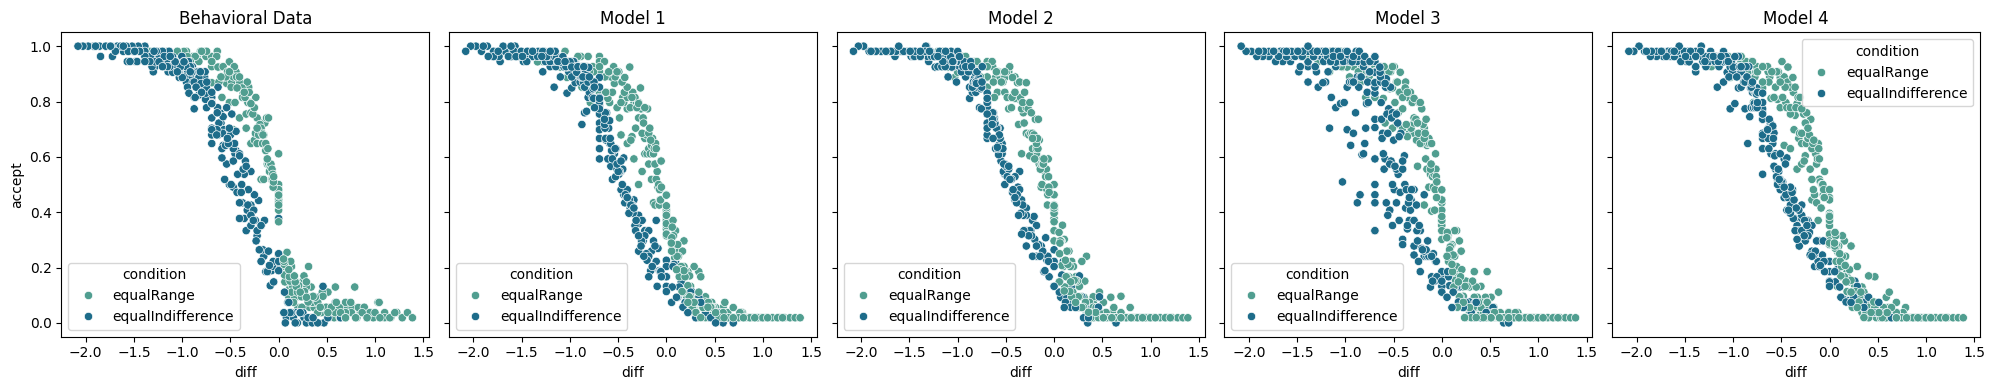

In [21]:
# Acceptances and stimuli
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
sns.scatterplot(
    data=data, x="diff", y="accept", hue="condition", ax=axs[0], palette="crest"
)
axs[0].set_title("Behavioral Data")
sns.scatterplot(
    data=model1_samples,
    x="diff",
    y="accept",
    hue="condition",
    ax=axs[1],
    palette="crest",
)
axs[1].set_title("Model 1")
sns.scatterplot(
    data=model2_samples,
    x="diff",
    y="accept",
    hue="condition",
    ax=axs[2],
    palette="crest",
)
axs[2].set_title("Model 2")
sns.scatterplot(
    data=model3_samples,
    x="diff",
    y="accept",
    hue="condition",
    ax=axs[3],
    palette="crest",
)
axs[3].set_title("Model 3")
sns.scatterplot(
    data=model4_samples,
    x="diff",
    y="accept",
    hue="condition",
    ax=axs[4],
    palette="crest",
)
axs[4].set_title("Model 4")
plt.tight_layout()
plt.show()

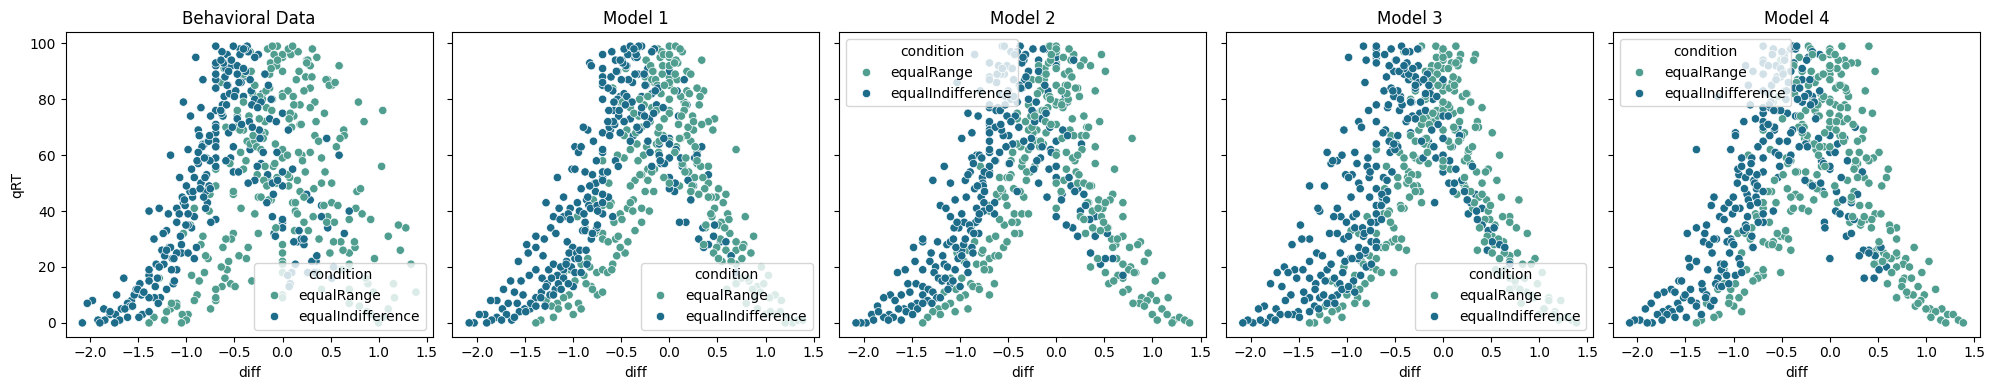

In [22]:
# RT and stimuli
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
sns.scatterplot(
    data=data, x="diff", y="qRT", hue="condition", ax=axs[0], palette="crest"
)
axs[0].set_title("Behavioral Data")
sns.scatterplot(
    data=model1_samples, x="diff", y="qRT", hue="condition", ax=axs[1], palette="crest"
)
axs[1].set_title("Model 1")
sns.scatterplot(
    data=model2_samples, x="diff", y="qRT", hue="condition", ax=axs[2], palette="crest"
)
axs[2].set_title("Model 2")
sns.scatterplot(
    data=model3_samples, x="diff", y="qRT", hue="condition", ax=axs[3], palette="crest"
)
axs[3].set_title("Model 3")
sns.scatterplot(
    data=model4_samples, x="diff", y="qRT", hue="condition", ax=axs[4], palette="crest"
)
axs[4].set_title("Model 4")
plt.tight_layout()
plt.show()

In [29]:
# Correlate them
acceptances, qRTs = [], []

for d in [data, model1_samples, model2_samples, model3_samples, model4_samples]:
    acceptances.append(d.sort_values(by=["gain", "loss"])["accept"].values)
    qRTs.append(d.sort_values(by=["gain", "loss"])["qRT"].values)

acceptances, qRTs = np.array(acceptances), np.array(qRTs)

In [31]:
print("Acceptances correlation:")
print(np.corrcoef(acceptances))

print("RTs correlation:")
print(np.corrcoef(qRTs))

Acceptances correlation:
[[1.         0.98165113 0.98416589 0.96815559 0.98090877]
 [0.98165113 1.         0.99044214 0.97547534 0.99042105]
 [0.98416589 0.99044214 1.         0.96954531 0.98883023]
 [0.96815559 0.97547534 0.96954531 1.         0.97568407]
 [0.98090877 0.99042105 0.98883023 0.97568407 1.        ]]
RTs correlation:
[[1.         0.64600582 0.64768982 0.59164322 0.60468494]
 [0.64600582 1.         0.89218892 0.89122364 0.86439821]
 [0.64768982 0.89218892 1.         0.87894251 0.87112958]
 [0.59164322 0.89122364 0.87894251 1.         0.84825132]
 [0.60468494 0.86439821 0.87112958 0.84825132 1.        ]]


Model 2 is chosen!

In [15]:
params_fit["model_ID"] = pd.Categorical(params_fit["model_ID"])
params_fit["sub"] = pd.Categorical(params_fit["sub"])

In [19]:
loss_data = params_fit.query("param_name == 'BIC'")
model = sm.mixedlm(
    "mean ~ model_ID", loss_data, groups=loss_data["sub"], re_formula="~model_ID"
).fit()

/Users/gustxsr/Documents/Stanford/PoldrackLab/github/riskyneuroarousal/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gustxsr/Documents/Stanford/PoldrackLab/github/riskyneuroarousal/.venv/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/gustxsr/Documents/Stanford/PoldrackLab/github/riskyneuroarousal/.venv/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [20]:
print(model.summary())

                      Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         mean      
No. Observations:          432             Method:                     REML      
No. Groups:                108             Scale:                      179.2043  
Min. group size:           4               Log-Likelihood:             -2154.3501
Max. group size:           4               Converged:                  Yes       
Mean group size:           4.0                                                   
---------------------------------------------------------------------------------
                                    Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------------------------------
Intercept                           427.801   12.919 33.115 0.000 402.481 453.121
model_ID[T.2]                        -0.414    2.339 -0.177 0.860  -4.999   4.171
model_ID[T.3]                         

From this, we get that model 1 and model 2 are the best models. 

([], [])

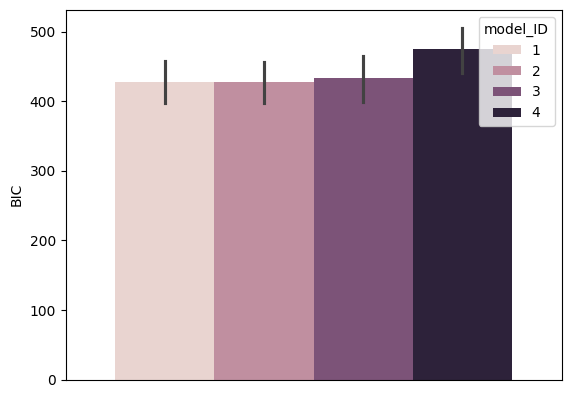

In [34]:
sns.barplot(
    params_fit.query("param_name == 'BIC'"), x="param_name", y="mean", hue="model_ID"
)
plt.ylabel("BIC")
plt.xlabel("")
plt.xticks([])